<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-581595-1694703010/blob/main/Assignment5_21BKT0006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd

# Assuming you uploaded a CSV file named 'your_uploaded_dataset.csv'
file_name = 'Mall_Customers.csv'

# Load the uploaded CSV file into a DataFrame
df = pd.read_csv(file_name)

# Now, you can work with 'df' as your dataset


First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Summary statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75% 

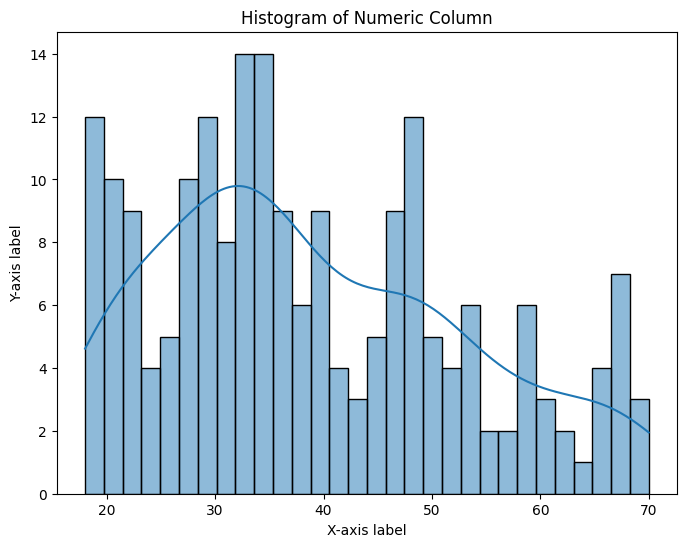

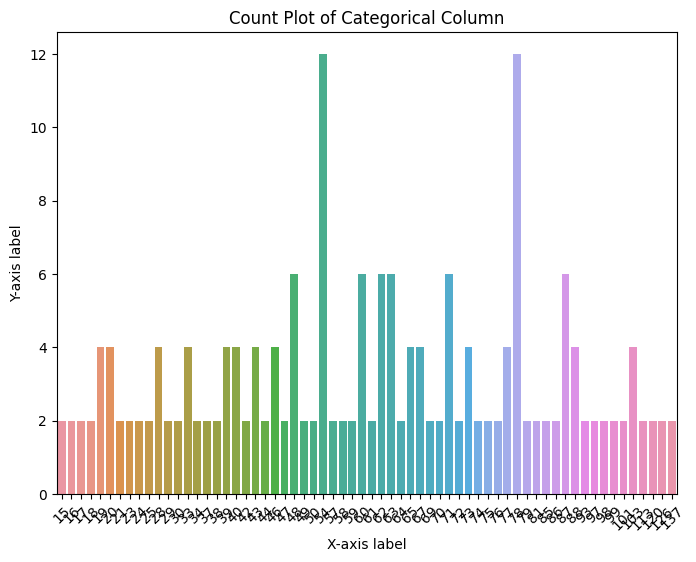

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset_path' with the actual path)
# For example, if you've uploaded a CSV file:
# dataset_path = '/content/your_uploaded_dataset.csv'
# df = pd.read_csv(dataset_path)

# If you've already uploaded the dataset using files.upload(), you can access it from the 'uploaded' dictionary.
# Assuming the file is named 'your_uploaded_dataset.csv'
import io
uploaded_file_name = 'Mall_Customers.csv'
df = pd.read_csv(io.StringIO(uploaded[uploaded_file_name].decode('utf-8')))

# Explore the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get basic statistics of numeric columns
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data visualization (replace column names with actual column names)
# Example: Histogram of a numeric column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Histogram of Numeric Column')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

# Example: Count plot of a categorical column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Annual Income (k$)')
plt.title('Count Plot of Categorical Column')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Import necessary libraries
import pandas as pd

# Load your dataset
df = pd.read_csv('Mall_Customers.csv')

# Data Preprocessing Steps

# 1. Handling Missing Values (if needed)
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# If there are missing values, you can choose to drop rows with missing values or fill them.
# For example, filling missing values with the mean of the column:
# df.fillna(df.mean(), inplace=True)

# 2. Encoding Categorical Variables (if needed)
# If 'Gender' is a categorical variable, you can one-hot encode it.
df = pd.get_dummies(df, columns=['Gender'], prefix=['Gender'])

# 3. Feature Scaling (if needed)
# If the 'Age', 'Annual Income (k$)', or 'Spending Score (1-100)' columns need scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# 4. Feature Selection (Optional)
# Depending on your analysis or modeling goals, you may select relevant features.
# For example, selecting specific columns:
# selected_features = ['Age', 'Annual Income (k$)', 'Gender_Female', 'Gender_Male']
# df = df[selected_features]

# Now, your data is preprocessed and ready for analysis or modeling.


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


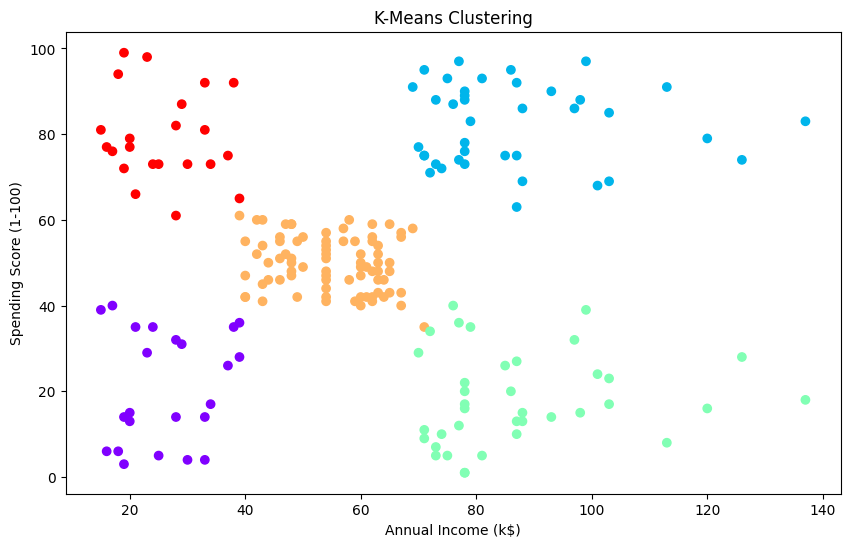

Cluster Centers:
         Age  Annual Income (k$)  Spending Score (1-100)
0  45.217391           26.304348               20.913043
1  32.692308           86.538462               82.128205
2  40.324324           87.432432               18.189189
3  43.126582           54.822785               49.835443
4  25.272727           25.727273               79.363636


In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your dataset
df = pd.read_csv('Mall_Customers.csv')

# Select features for clustering (Age, Annual Income, and Spending Score)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Choose the number of clusters (you can adjust this based on your problem)
num_clusters = 5

# Fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (you can choose different visualization methods)
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# View cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)

# Analyze and interpret the clusters based on your problem
# You can use cluster_centers and other analysis methods to understand customer segments.
